In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import patchify
import os

In [2]:
import imageio

In [3]:
# David Warde-Farley
# https://gist.github.com/dwf/1766222
def read_npy_chunk(filename, start_row, num_rows):
    assert start_row >= 0 and num_rows > 0
    with open(filename, 'rb') as fhandle:
        major, minor = np.lib.format.read_magic(fhandle)
        shape, fortran, dtype = np.lib.format.read_array_header_1_0(fhandle)
        assert not fortran, "Fortran order arrays not supported"
        assert start_row < shape[0], (
            'start_row is beyond end of file'
        )
        try:
            assert start_row + num_rows <= shape[0], (
                'start_row + num_rows > shape[0]'
            )
        except:
            num_rows = shape[0] - start_row
            assert start_row + num_rows <= shape[0], (
                'start_row + num_rows > shape[0]'
            )
        row_size = np.prod(shape[1:])
        start_byte = int(start_row * row_size * dtype.itemsize)
        fhandle.seek(start_byte, 1)
        n_items = int(row_size * num_rows)
        flat = np.fromfile(fhandle, count=n_items, dtype=dtype)
        return flat.reshape((-1,) + shape[1:])

In [13]:
def maskImg(img, threshold):
    mask = img.copy()
    mask[mask <= threshold] = np.nan
    return mask

def plot_mask(img, msk, alpha=0.3, threshold=0):
    fig, axarr = plt.subplots(1,2, figsize=(20, 8))
    
    axarr[0].imshow(img, cmap='viridis', interpolation='None')
    axarr[1].imshow(img, cmap='viridis', interpolation='None')
    axarr[1].imshow(maskImg(msk, threshold), alpha=alpha, cmap='hot', interpolation='None')

    plt.show()

# Cancer_Segmentation

In [5]:
part = 'p3'
base_dir = 'Cancer_Segmentation/Part3'
types = np.load(base_dir+'/Images/types.npy')
print(types.shape)

(2722,)


In [17]:
un_types = np.unique(types, return_counts=True)
print(un_types[0])
print(un_types[1])

for i in range(len(un_types[0])):
    type = un_types[0][i]
    pathdir = 'Cancer_Segmentation/'+type
    if not os.path.exists(pathdir):
        os.makedirs(pathdir)

['Adrenal_gland' 'Bile-duct' 'Bladder' 'Breast' 'Cervix' 'Colon'
 'Esophagus' 'HeadNeck' 'Kidney' 'Liver' 'Lung' 'Ovarian' 'Pancreatic'
 'Prostate' 'Skin' 'Stomach' 'Testis' 'Thyroid' 'Uterus']
[155 158  64 775  86 494 141 145  41  93  51  52  28  68  41  48  57  62
 163]


In [179]:
ip=2200
imags = read_npy_chunk(base_dir+'/Images/images.npy', ip, 10)
masks = read_npy_chunk(base_dir+'/Masks/masks.npy', ip, 10)
for i in range(len(imags)):
    print(masks[i][:,:,3].max(), masks[i][:,:,4].max())

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


Liver


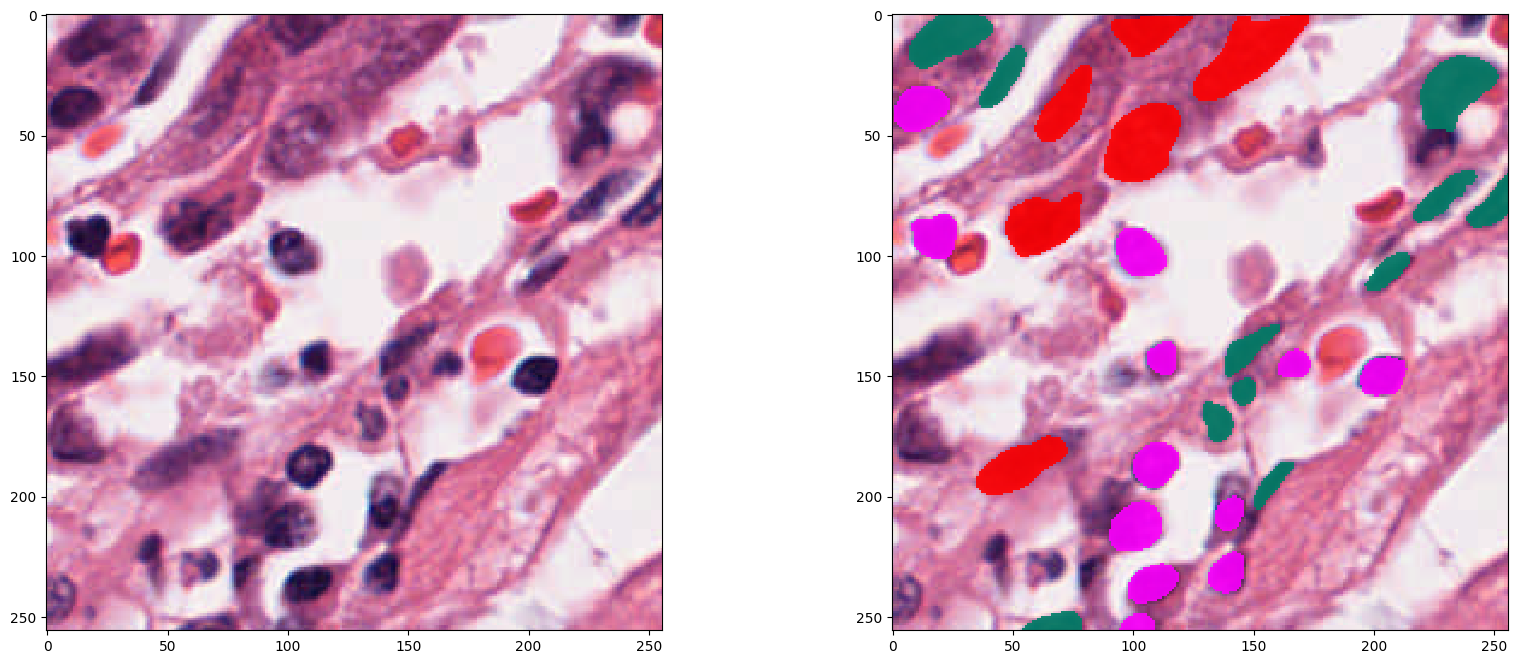

In [181]:
iaki=8

print(types[ip + iaki])
fig, axarr = plt.subplots(1,2, figsize=(20, 8))
axarr[0].imshow(imags[iaki]/255.0, cmap='viridis', interpolation='None')
axarr[1].imshow(imags[iaki]/255.0, cmap='viridis', interpolation='None')

msk = masks[iaki][:,:,0]
msk[msk != 0] = 1
axarr[1].imshow(maskImg(msk.astype(float), 0), alpha=0.9, cmap='autumn', interpolation='None')

msk = masks[iaki][:,:,1]
msk[msk != 0] = 1
axarr[1].imshow(maskImg(msk.astype(float), 0), alpha=0.9, cmap='spring', interpolation='None')

msk = masks[iaki][:,:,2]
msk[msk != 0] = 1
axarr[1].imshow(maskImg(msk.astype(float), 0), alpha=0.9, cmap='summer', interpolation='None')

msk = masks[iaki][:,:,3]
msk[msk != 0] = 1
axarr[1].imshow(maskImg(msk.astype(float), 0), alpha=0.9, cmap='winter', interpolation='None')

msk = masks[iaki][:,:,4]
msk[msk != 0] = 1
axarr[1].imshow(maskImg(msk.astype(float), 0), alpha=0.9, cmap='hot', interpolation='None')

plt.savefig("dataseliver1.pdf", format="pdf", bbox_inches='tight')

In [ ]:
batch = 10

for i in range(0, len(types), batch):
    imags = read_npy_chunk(base_dir+'/Images/images.npy', i, batch)
    masks = read_npy_chunk(base_dir+'/Masks/masks.npy', i, batch)
    masks[masks != 0] = 1
    for j in range(len(imags)):
        pos = i + j
        msk = masks[j][:,:,0]
        msk[msk != 0] = 1
        msk = np.expand_dims(msk, axis=2)
        np.save('Cancer_Segmentation/'+types[pos]+'/'+part+'_'+str(pos)+'.npy', imags[j]/255.0)
        np.save('Cancer_Segmentation/'+types[pos]+'/'+part+'_'+str(pos)+'_mask.npy', msk.astype(float))
        #print('Cancer_Segmentation/'+types[pos]+'/'+str(pos)+'.npy')

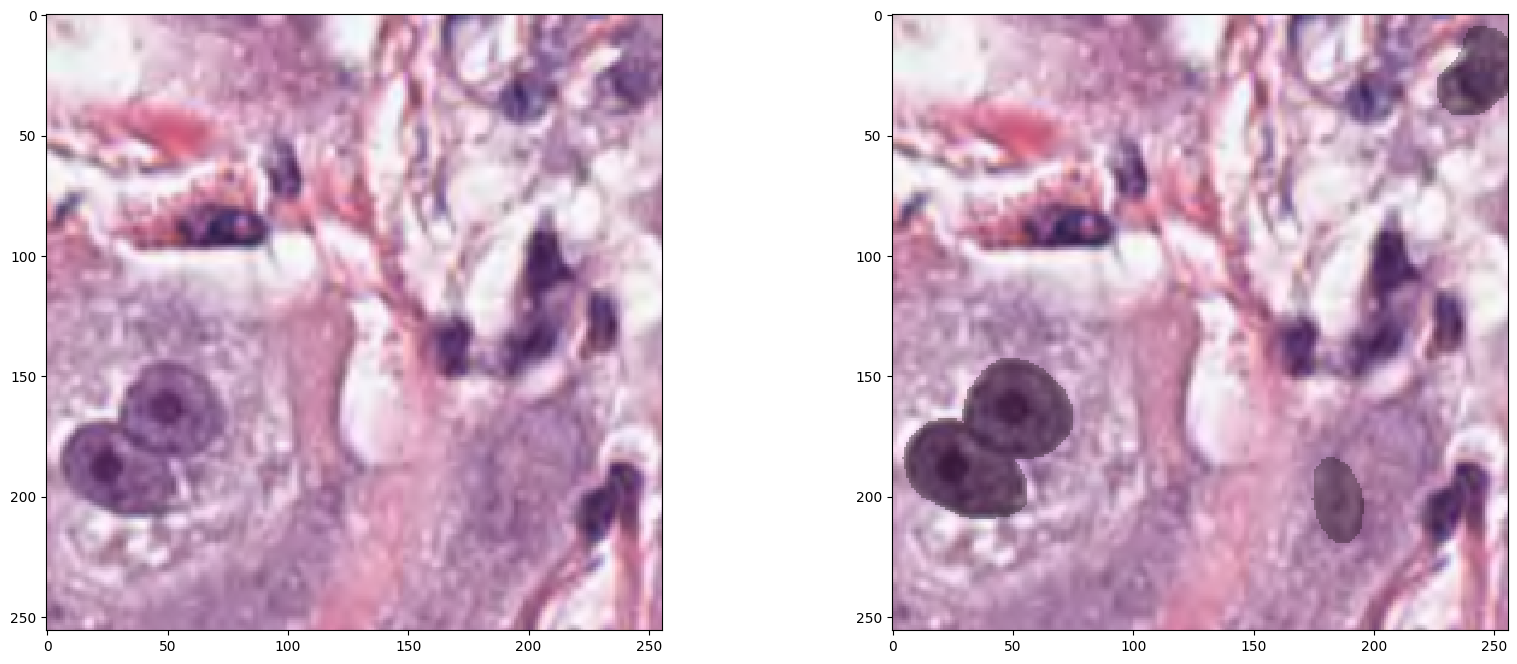

In [110]:
plot_mask(
    np.load('Cancer_Segmentation/Breast/p1_0.npy'),
    np.load('Cancer_Segmentation/Breast/p1_0_mask.npy')
)

0: Neoplastic cells

1: Inflammatory

2: Connective/Soft tissue cells

3: Dead Cells

4: Epithelial

6: Background)

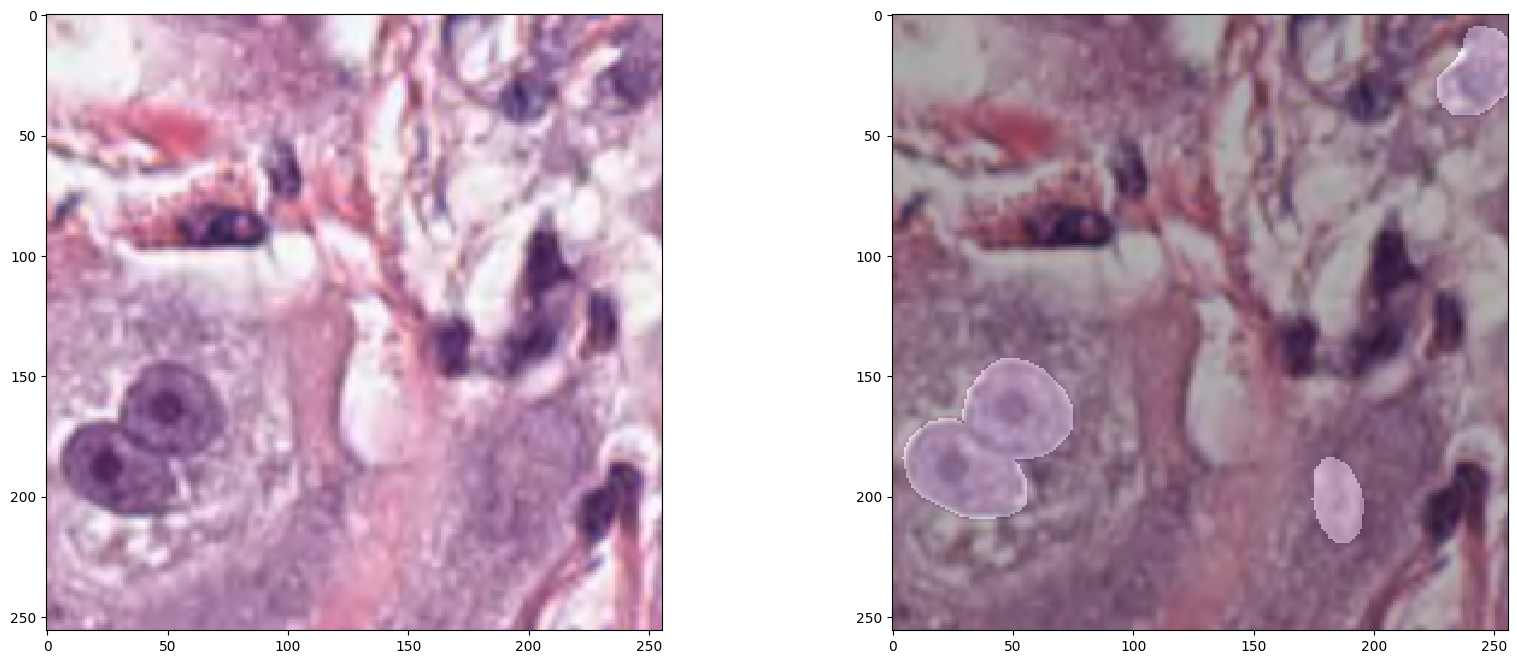

In [71]:
cancer_mask = masks[0][:,:,0].astype(int)
cancer_mask[cancer_mask != 0] = 1
plot_mask(imags[0].astype(int), cancer_mask)

# BCSS

In [144]:
base_dir = 'BCSS'
files = os.listdir(base_dir+'/rgbs_colorNormalized')

In [ ]:
for file in files:
    image = imageio.imread(base_dir+'/rgbs_colorNormalized/'+file)
    mask = imageio.imread(base_dir+'/masks/'+file)
    mask[mask != 1] = 0
    renamed_file = file[:-4]
    
    patches = patchify.patchify(image, (256, 256, 3), step=256)
    ptmasks = patchify.patchify(mask, (256, 256), step=256)

    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):

            res = np.unique(ptmasks[i,j], return_counts=True)
            if len(res[1]) == 1: # full positive or full negative
                continue
            percent_tumor = res[1][1] / res[1].sum()
            if percent_tumor < 0.05: # menos de 5% de tumor
                continue

            msk = np.expand_dims(ptmasks[i,j], axis=2)
            np.save('BCSS/'+renamed_file+'_'+str(i)+'_'+str(j)+'.npy', patches[i,j][0]/255.0)
            np.save('BCSS/'+renamed_file+'_'+str(i)+'_'+str(j)+'_mask.npy', msk.astype(float))

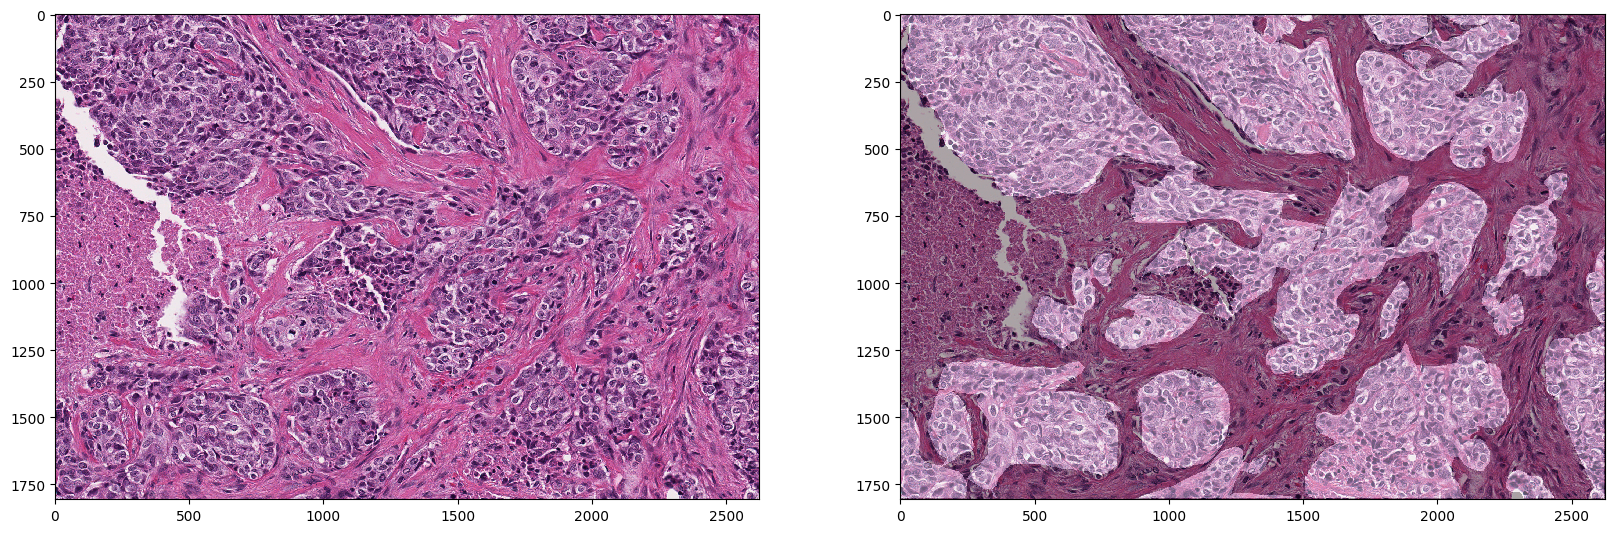

In [146]:
plot_mask(image, mask)#, alpha=1.0)

In [ ]:
plot_mask(patches[0,4][0], ptmasks[0,4])
#ptmasks[0,0].shape

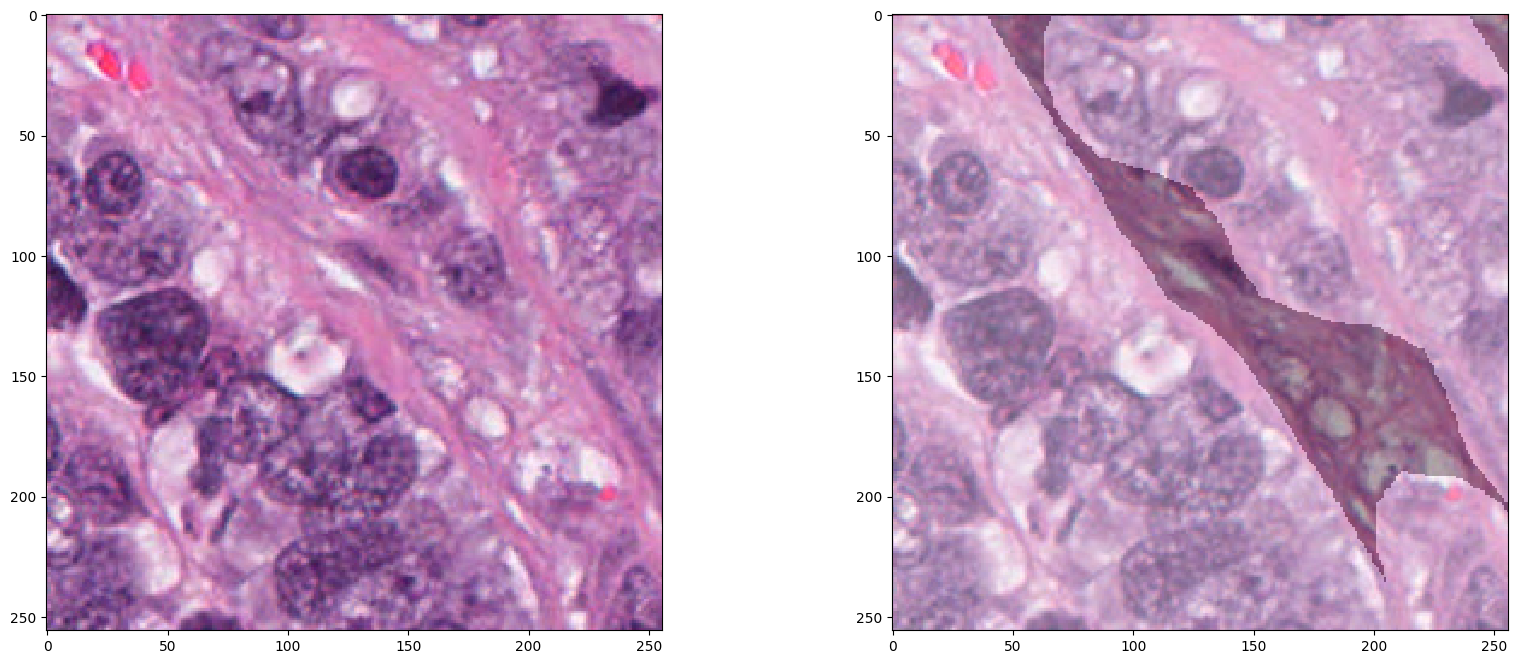

In [148]:
plot_mask(
    np.load('BCSS/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0.2500_0_12.npy'),
    np.load('BCSS/TCGA-A1-A0SK-DX1_xmin45749_ymin25055_MPP-0.2500_0_12_mask.npy')
)

# LungFCP

In [203]:
base_dir = 'LungFCP'
part = '0006' # 0006
files = os.listdir(base_dir+'/LungFCP-01-'+part+'/histology/imgs')

In [204]:
for file in files:
    im = np.array(Image.open(base_dir+'/LungFCP-01-'+part+'/histology/imgs/'+file))
    mk = np.array(Image.open(base_dir+'/LungFCP-01-'+part+'/histology/masks/lesion/'+file))
    mk = mk[:,:,:1]
    mk[mk != 0] = 1
    renamed_file = file[:-4]
    
    patches = patchify.patchify(im, (256, 256, 3), step=256)
    ptmasks = patchify.patchify(mk, (256, 256, 1), step=256)

    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):

            res = np.unique(ptmasks[i,j][0], return_counts=True)
            if len(res[1]) == 1: # full positive or full negative
                continue
            percent_tumor = res[1][1] / res[1].sum()
            if percent_tumor < 0.05: # menos de 5% de tumor
                continue

            np.save('LungFCP/'+part+'_'+renamed_file+'_'+str(i)+'_'+str(j)+'.npy', patches[i,j][0]/255.0)
            np.save('LungFCP/'+part+'_'+renamed_file+'_'+str(i)+'_'+str(j)+'_mask.npy', ptmasks[i,j][0].astype(float))

(26, 21, 1, 256, 256, 3)
(5693440, 1024, 256, 22240, 4, 1)
(26, 21, 1, 256, 256, 1)
(5693440, 1024, 256, 22240, 4, 1)
(22, 33, 1, 256, 256, 3)
(8714240, 1024, 256, 34040, 4, 1)
(22, 33, 1, 256, 256, 1)
(8714240, 1024, 256, 34040, 4, 1)
(19, 24, 1, 256, 256, 3)
(6430720, 1024, 256, 25120, 4, 1)
(19, 24, 1, 256, 256, 1)
(6430720, 1024, 256, 25120, 4, 1)
(34, 22, 1, 256, 256, 3)
(5851136, 1024, 256, 22856, 4, 1)
(34, 22, 1, 256, 256, 1)
(5851136, 1024, 256, 22856, 4, 1)
(15, 32, 1, 256, 256, 3)
(8474624, 1024, 256, 33104, 4, 1)
(15, 32, 1, 256, 256, 1)
(8474624, 1024, 256, 33104, 4, 1)


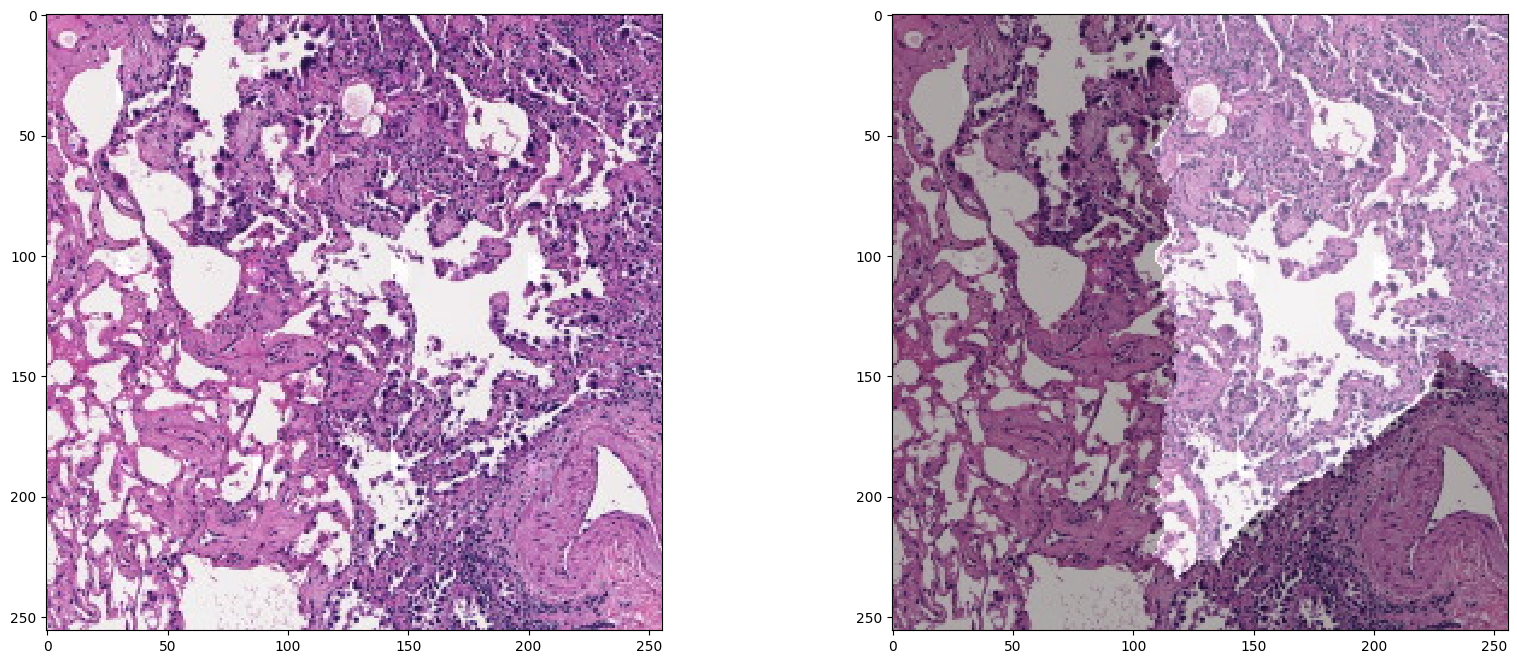

In [194]:
plot_mask(
    np.load('LungFCP/0001_LungFCP-01-0001_B1_10_5.npy'),
    np.load('LungFCP/0001_LungFCP-01-0001_B1_10_5_mask.npy')
)